In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
723,724,0,2,"Hodges, Mr. Henry Price",male,50.0,0,0,250643,13.0,NaN,S


In [5]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
620,621,0,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C
44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q
211,212,1,2,"Cameron, Miss. Clear Annie",female,35.0,0,0,F.C.C. 13528,21.0000,NaN,S
353,354,0,3,"Arnold-Franchi, Mr. Josef",male,25.0,1,0,349237,17.8000,NaN,S


In [6]:
# df.shape()

In [7]:
df.shape


(891, 12)

In [8]:
df.PassengerId.nunique()

891

In [9]:
df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
print(df.Survived.nunique(),df.Survived.unique())


2 [0 1]


In [11]:
print(df.Survived.value_counts(),df.Survived.value_counts(normalize=True))

Survived
0    549
1    342
Name: count, dtype: int64 Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [12]:
df.Fare.isnull().sum()

0

In [13]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [14]:
# df[df.Pclass].Fare.describe()

In [15]:
df.groupby('Pclass').Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


In [16]:
numerics = ['int64','float64']
numlist = df.select_dtypes(include=numerics).columns[2:]
numlist
#df = df.select_dtypes(include=numerics)

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [17]:
for i in numlist:
    n = df[i].isnull().sum()/df.shape[0]
    print(n)

0.0
0.19865319865319866
0.0
0.0
0.0


In [18]:
nlist = []

for i in numlist:
    n = df[i].isnull().sum()/df.shape[0]
    if n < 0.1:
        nlist.append(i)
print(nlist)

['Pclass', 'SibSp', 'Parch', 'Fare']


In [19]:
nlist1 = nlist.append(df.columns[:1].tolist())
print(nlist1)

None


In [20]:
numerics = ['int64','float64']
numlist = df.select_dtypes(include=numerics).columns
numlist

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [21]:
nlist = []

for i in numlist:
    n = df[i].isnull().sum()/df.shape[0]
    if n < 0.1:
        nlist.append(i)
print(nlist)

['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Fare']


In [22]:
df_useful = df[nlist]
df_useful.sample(10)

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
321,322,0,3,0,0,7.8958
376,377,1,3,0,0,7.2500
569,570,1,3,0,0,7.8542
869,870,1,3,1,1,11.1333
732,733,0,2,0,0,0.0000
853,854,1,1,0,1,39.4000
285,286,0,3,0,0,8.6625
550,551,1,1,0,2,110.8833
50,51,0,3,4,1,39.6875
805,806,0,3,0,0,7.7750


In [23]:
#  import matplotlib.pyplot as plt 

# mi0=min(train[train.target==0][i])
#     mi1=min(train[train.target==1][i])
#     mi=min(mi0,mi1)
# #     print(mi)
    
#     ma0=max(train[train.target==0][i])
#     ma1=max(train[train.target==1][i])
#     ma=min(ma0,ma1)
# #     print(ma)


#     class0=plt.hist(train[train.target==0][i],density=True,color="gold",label="Not")
#     class1=plt.hist(train[train.target==1][i],density=True,color="green",label="Transported",alpha=0.6)
    
#     plt.title('Class distribution : '+ str(i))
#     plt.xlim(xmin=mi, xm

In [24]:
import matplotlib.pyplot as plt

(array([1.60355651e-02, 2.32209002e-03, 6.79101799e-04, 4.38130193e-05,
        2.40971606e-04, 1.31439058e-04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.57195289e-05]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

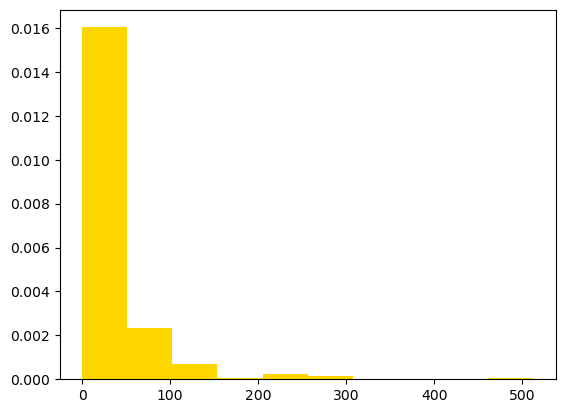

In [25]:
plt.hist(df_useful.Fare,density=True,color="gold",label="Not")

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

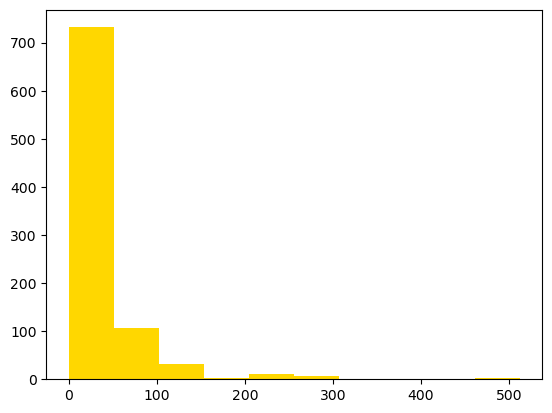

In [26]:
plt.hist(df_useful.Fare,color="gold",label="Not")

In [27]:
# mi0=min(train[train.target==0][i])
#     mi1=min(train[train.target==1][i])
#     mi=min(mi0,mi1)
# #     print(mi)
    
#     ma0=max(train[train.target==0][i])
#     ma1=max(train[train.target==1][i])
#     ma=min(ma0,ma1)
# #     print(ma)


#     class0=plt.hist(train[train.target==0][i],density=True,color="gold",label="Not")
#     class1=plt.hist(train[train.target==1][i],density=True,color="green",label="Transported",alpha=0.6)
    
#     plt.title('Class distribution : '+ str(i))
#     plt.xlim(xmin=mi, xmax = ma)
#     plt.legend()

#     plt.show()

In [28]:
print(
    df_useful[df_useful.Survived == 1].Fare.min(),df_useful[df_useful.Survived == 0].Fare.min()
)

0.0 0.0


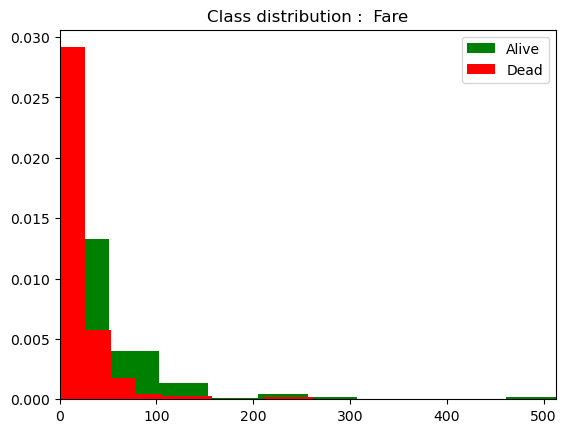

In [29]:

    min_alive = df_useful[df_useful.Survived == 1].Fare.min()
    min_dead = df_useful[df_useful.Survived == 0].Fare.min()
    max_alive = df_useful[df_useful.Survived == 1].Fare.max()
    max_dead = df_useful[df_useful.Survived == 0].Fare.max()
    min1 = min(min_alive, min_dead)
    max1 = max(max_alive, max_dead)

    plt.hist(df_useful[df_useful.Survived == 1].Fare,density=True,color="green",label="Alive")
    plt.hist(df_useful[df_useful.Survived == 0].Fare,density=True,color="red",label="Dead")

    plt.title('Class distribution :  Fare')
    plt.xlim(xmin=min1, xmax = max1)
    plt.legend()

    plt.show()

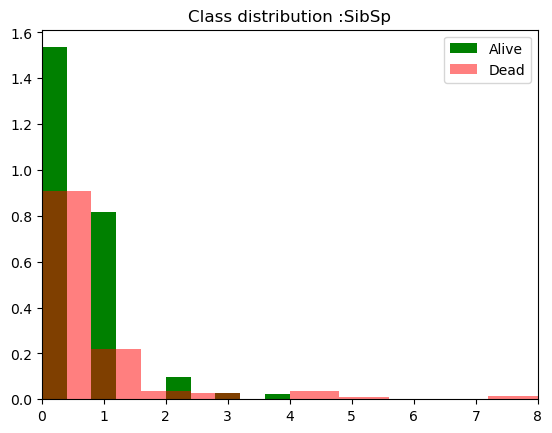

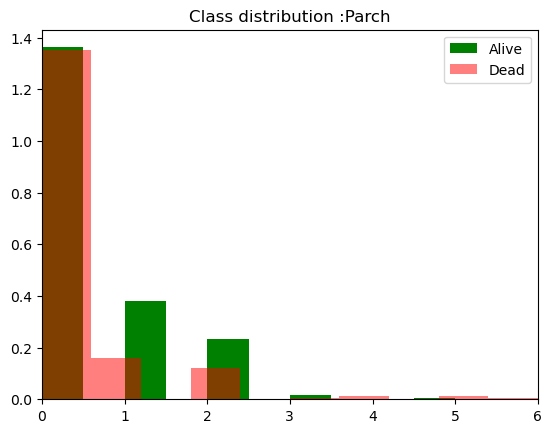

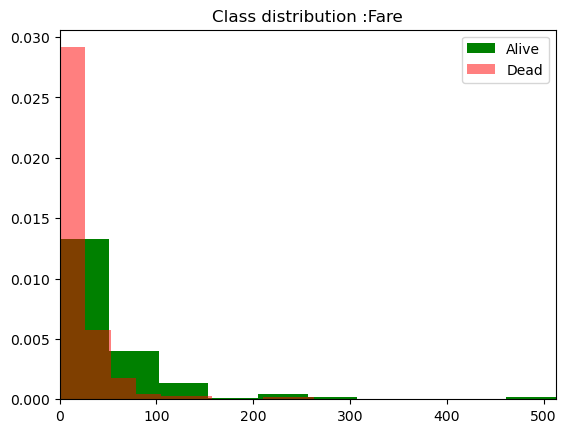

In [30]:
for i in df_useful.columns[-3:] : 
#     print (i)
    min_alive = df_useful[df_useful.Survived == 1][i].min()
    min_dead = df_useful[df_useful.Survived == 0][i].min()
    max_alive = df_useful[df_useful.Survived == 1][i].max()
    max_dead = df_useful[df_useful.Survived == 0][i].max()
    min1 = min(min_alive, min_dead)
    max1 = max(max_alive, max_dead)

    plt.hist(df_useful[df_useful.Survived == 1][i],density=True,color="green",label="Alive")
    plt.hist(df_useful[df_useful.Survived == 0][i],density=True,color="red",label="Dead",alpha=0.5)

    plt.title('Class distribution :' + str(i))
    plt.xlim(xmin=min1, xmax = max1)
    plt.legend()

    plt.show()

In [31]:
df_useful.Parch.describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [32]:
df_useful.Parch.value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [33]:
df_useful.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [34]:
# creating new var from PClass where we are condensing 3 Pclasses into 2
df_useful1 = df_useful.copy()
df_useful1['Pclass1'] = np.where(df_useful1.Pclass == 1,1,0)

In [35]:
# validating the newly created PClass1 column

pd.crosstab(df_useful1.Pclass1,df_useful1.Pclass)

Pclass,1,2,3
Pclass1,,,
0,0,184,491
1,216,0,0


In [36]:
# creating new var from SibSp and Parch and condense

df_useful1['SibSp1'] = np.where(df_useful1.SibSp <= 4,1,0)
pd.crosstab(df_useful1.SibSp1,df_useful1.SibSp)


SibSp,0,1,2,3,4,5,8
SibSp1,,,,,,,
0,0,0,0,0,0,5,7
1,608,209,28,16,18,0,0


In [37]:
df_useful1['SibSp2'] = np.where(df_useful1.SibSp == 0,0,1)
pd.crosstab(df_useful1.SibSp2,df_useful1.SibSp)

SibSp,0,1,2,3,4,5,8
SibSp2,,,,,,,
0,608,0,0,0,0,0,0
1,0,209,28,16,18,5,7


In [38]:
# check survival rate over SibSp2

SibSp2vsSurvival = df_useful1.groupby('SibSp2').agg({'Survived':'sum','SibSp2':'count'})
SibSp2vsSurvival['SurvivalRate'] = SibSp2vsSurvival.Survived/SibSp2vsSurvival.SibSp2
SibSp2vsSurvival

,Survived,SibSp2,SurvivalRate
SibSp2,,,
0,210,608,0.345395
1,132,283,0.466431


In [39]:
# creating new var from Parch and condense

df_useful1['Parch1'] = np.where(df_useful1.Parch <= 3,1,0)
pd.crosstab(df_useful1.Parch1,df_useful1.Parch)


Parch,0,1,2,3,4,5,6
Parch1,,,,,,,
0,0,0,0,0,4,5,1
1,678,118,80,5,0,0,0


In [40]:
# in Parch, divide 0 and 1 values

df_useful1['Parch2'] = np.where(df_useful1.Parch == 0,0,1)
pd.crosstab(df_useful1.Parch2,df_useful1.Parch)

Parch,0,1,2,3,4,5,6
Parch2,,,,,,,
0,678,0,0,0,0,0,0
1,0,118,80,5,4,5,1


In [41]:
# check survival rate over Parch2

Parch2vsSurvival = df_useful1.groupby('Parch2').agg({'Survived':'sum','Parch2':'count'})
Parch2vsSurvival['SurvivalRate'] = Parch2vsSurvival.Survived/Parch2vsSurvival.Parch2
Parch2vsSurvival

,Survived,Parch2,SurvivalRate
Parch2,,,
0,233,678,0.343658
1,109,213,0.511737


In [42]:
df_useful1

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Pclass1,SibSp1,SibSp2,Parch1,Parch2
0,1,0,3,1,0,7.2500,0,1,1,1,0
1,2,1,1,1,0,71.2833,1,1,1,1,0
2,3,1,3,0,0,7.9250,0,1,0,1,0
3,4,1,1,1,0,53.1000,1,1,1,1,0
4,5,0,3,0,0,8.0500,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,13.0000,0,1,0,1,0
887,888,1,1,0,0,30.0000,1,1,0,1,0
888,889,0,3,1,2,23.4500,0,1,1,1,1
889,890,1,1,0,0,30.0000,1,1,0,1,0


In [43]:
df_final_columns = df_useful1.columns

In [44]:
df_final_columns

Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Fare',
       'Pclass1', 'SibSp1', 'SibSp2', 'Parch1', 'Parch2'],
      dtype='object')

In [45]:
df_final_useful_columns = [df_final_columns[:2], df_final_columns[5:6], df_final_columns[-1:]]

df_final_useful_columns

[Index(['PassengerId', 'Survived'], dtype='object'),
 Index(['Fare'], dtype='object'),
 Index(['Parch2'], dtype='object')]

In [46]:
# adding Family column. If SibSp2 or Parch2 > 0 Family is true(1), else false(0) 

df_useful1['Family'] = np.where((df_useful1.SibSp2 > 0) | (df_useful1.Parch2 > 0), 1,0)
df_useful1

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Pclass1,SibSp1,SibSp2,Parch1,Parch2,Family
0,1,0,3,1,0,7.2500,0,1,1,1,0,1
1,2,1,1,1,0,71.2833,1,1,1,1,0,1
2,3,1,3,0,0,7.9250,0,1,0,1,0,0
3,4,1,1,1,0,53.1000,1,1,1,1,0,1
4,5,0,3,0,0,8.0500,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,13.0000,0,1,0,1,0,0
887,888,1,1,0,0,30.0000,1,1,0,1,0,0
888,889,0,3,1,2,23.4500,0,1,1,1,1,1
889,890,1,1,0,0,30.0000,1,1,0,1,0,0


In [47]:
pd.crosstab(df_useful1.Family,df_useful1.Parch2)

Parch2,0,1
Family,,
0,537,0
1,141,213


In [48]:
pd.crosstab(df_useful1.Family,df_useful1.Parch2)

Parch2,0,1
Family,,
0,537,0
1,141,213


In [49]:
df_final_columns = df_useful1.columns
df_final_columns.tolist()
df_final_columns

Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Fare',
       'Pclass1', 'SibSp1', 'SibSp2', 'Parch1', 'Parch2', 'Family'],
      dtype='object')

In [50]:
# removal_items = ['Pclass', 'SibSp', 'Parch', 'SibSp1', 'Parch1']

# df_final_columns.remove(removal_items)

# # for i in removal_items:
# #     df_final_columns.remove(removal_items[i])
# df_final_columns

In [51]:
df_final_columns1 = df_useful1[['PassengerId', 'Survived', 'Fare', 'Pclass1',  'SibSp2', 'Parch2', 'Family']]
df_final_columns1.sample(10)

,PassengerId,Survived,Fare,Pclass1,SibSp2,Parch2,Family
767,768,0,7.7500,0,0,0,0
125,126,1,11.2417,0,1,0,1
388,389,0,7.7292,0,0,0,0
72,73,0,73.5000,0,0,0,0
196,197,0,7.7500,0,0,0,0
496,497,1,78.2667,1,1,0,1
546,547,1,26.0000,0,1,0,1
380,381,1,227.5250,1,0,0,0
130,131,0,7.8958,0,0,0,0
406,407,0,7.7500,0,0,0,0


In [52]:
df_final_columns1.to_csv(r'C:\Users\soft_demolition\Desktop\KAGGLE\TitanicLogisticReg.csv', index=False, header=True)

In [53]:
# check survival rate over gender/sex



pd.crosstab(df.Sex,df.Survived)

# SexvsSurvival = df.groupby('Sex').agg({'Survived':'sum','Sex':'count'})
# SexvsSurvival['SurvivalRate'] = SexvsSurvival.Survived/SexvsSurvival.Sex
# SibSp2vsSurvival

Survived,0,1
Sex,,
female,81,233
male,468,109


In [54]:
df_final_columns2 = pd.merge(df_final_columns1,df[['PassengerId', 'Sex']],on='PassengerId',how='left')
df_final_columns2.sample(10)

,PassengerId,Survived,Fare,Pclass1,SibSp2,Parch2,Family,Sex
458,459,1,10.5000,0,0,0,0,female
610,611,0,31.2750,0,1,1,1,female
236,237,0,26.0000,0,1,0,1,male
408,409,0,7.7750,0,0,0,0,male
49,50,0,17.8000,0,1,0,1,female
680,681,0,8.1375,0,0,0,0,female
340,341,1,26.0000,0,1,1,1,male
601,602,0,7.8958,0,0,0,0,male
700,701,1,227.5250,1,1,0,1,female
264,265,0,7.7500,0,0,0,0,female


In [55]:
df_final_columns2['Sex1'] = np.where(df_final_columns2.Sex == "female",0,1)
pd.crosstab(df_final_columns2.Sex1,df_final_columns2.Sex)

Sex,female,male
Sex1,,
0,314,0
1,0,577


In [56]:
df_final_columns2 = df_final_columns2.drop('Sex', axis=1)
df_final_columns2.sample(10)

,PassengerId,Survived,Fare,Pclass1,SibSp2,Parch2,Family,Sex1
31,32,1,146.5208,1,1,0,1,0
788,789,1,20.5750,0,1,1,1,1
614,615,0,8.0500,0,0,0,0,1
61,62,1,80.0000,1,0,0,0,0
179,180,0,0.0000,0,0,0,0,1
590,591,0,7.1250,0,0,0,0,1
724,725,1,53.1000,1,1,0,1,1
453,454,1,89.1042,1,1,0,1,1
72,73,0,73.5000,0,0,0,0,1
396,397,0,7.8542,0,0,0,0,0


In [57]:
# df_final_columns2.to_csv(r'C:\Users\soft_demolition\Desktop\KAGGLE\TitanicLogisticReg.csv', index=False, header=True)

In [58]:
df.Cabin.isnull().sum()/df.shape[0]

0.7710437710437711

In [59]:
pd.crosstab(df.Embarked,df.Survived)

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [60]:
93/(93+75) , 30/77, 217/(217+427)

(0.5535714285714286, 0.38961038961038963, 0.33695652173913043)

In [61]:
# df_final_columns2['Embarked1'] = np.where(df_useful1.SibSp == 0,0,1)

df_final_columns2.columns

Index(['PassengerId', 'Survived', 'Fare', 'Pclass1', 'SibSp2', 'Parch2',
       'Family', 'Sex1'],
      dtype='object')

In [62]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [63]:
df['Embarked1'] = np.where(df.Embarked.isin(['Q','S']),0,1)


In [70]:
df.Embarked1.value_counts()

Embarked1
0    721
1    170
Name: count, dtype: int64

In [71]:
EmbarkedvsSurvival = df.groupby('Embarked1').agg({'Survived':'sum','Embarked1':'count'})
# EmbarkedvsSurvival['EmbarkedSurvivalRate'] = EmbarkedvsSurvival.Survived/EmbarkedvsSurvival.Embarked1
# SibSp2vsSurvival

In [72]:
EmbarkedvsSurvival

,Survived,Embarked1
Embarked1,,
0,247,721
1,95,170


In [73]:
EmbarkedvsSurvival['EmbarkedSurvivalRate'] = EmbarkedvsSurvival.Survived/EmbarkedvsSurvival.Embarked1
EmbarkedvsSurvival

,Survived,Embarked1,EmbarkedSurvivalRate
Embarked1,,,
0,247,721,0.342580
1,95,170,0.558824


In [74]:
df_final_columns3 = pd.merge(df_final_columns2,df[['PassengerId', 'Embarked1']],on='PassengerId',how='left')
df_final_columns3.sample(10)

,PassengerId,Survived,Fare,Pclass1,SibSp2,Parch2,Family,Sex1,Embarked1
217,218,0,27.0000,0,1,0,1,1,0
433,434,0,7.1250,0,0,0,0,1,0
792,793,0,69.5500,0,1,1,1,0,0
22,23,1,8.0292,0,0,0,0,0,0
425,426,0,7.2500,0,0,0,0,1,0
831,832,1,18.7500,0,1,1,1,1,0
884,885,0,7.0500,0,0,0,0,1,0
508,509,0,22.5250,0,0,0,0,1,0
607,608,1,30.5000,1,0,0,0,1,0
568,569,0,7.2292,0,0,0,0,1,1


In [75]:
df_final_columns3.to_csv(r'C:\Users\soft_demolition\Desktop\KAGGLE\TitanicLogisticReg.csv', index=False, header=True)